# Applied Data Science Capstone - Final Project
#### Sam Stump
January 2020

## 1. Introduction 
Wilmington, Delaware USA and Philadelphia, Pennsylvania USA are only 32 miles (52 km) apart 
center to center.
By population, Philadelphia, at 1.5 million, is nearly 20 times the size of Wilmington, which
is home to about 77 thousand.
Successful businesses in Wilmington will look to expand in the Philadelphia area due to its 
proximity and market size.

This project attempts to the characterize and cluster the neighborhoods of Philadelphia according
to the categories of venues in those neighborhoods.
Businesses looking to expand in Philadelphia can use this data to identify potential new 
establishments in neighborhoods that are similar to existing locations.   

## 2. Orientation
This section will present a few maps of the area to help the reader become familiar with this part
of the country.

### 2.1 Map of Philadelphia, Wilmington and Surrounding Area

In [19]:
# plot a map of the area
import geocoder
import folium

# Wilmington City Hall
g = geocoder.arcgis('800 North French Street, Wilmington, DE')
props = g.geojson['features'][0]['properties']
city_hall_wilmington = (props['lat'], props['lng']) 

# Philadelphia City Hall
g = geocoder.arcgis('City Hall, Philadelphia, PA')
props = g.geojson['features'][0]['properties']
city_hall_philadelphia = (props['lat'], props['lng'])

# Compute a point for the center of the map
map_center = (
    (city_hall_wilmington[0] + city_hall_philadelphia[0])/2, 
    (city_hall_wilmington[1] + city_hall_philadelphia[1])/2)

# Plot the map, mark city hall in each city.
the_map = folium.Map(location=map_center, zoom_start=9)

marker_radius = 10
marker_color = 'red'
folium.CircleMarker(location=city_hall_wilmington, radius=marker_radius, tooltip="Wilmington City Hall", fill=True, color=marker_color).add_to(the_map)
folium.CircleMarker(location=city_hall_philadelphia, radius=marker_radius, tooltip="Philadelphia City Hall", fill=True, color=marker_color).add_to(the_map)
the_map

### 2.2 Planning Zones and Neighborhoods of Philadelphia
The city of Philadelphia is divided into 12 planning zones, and each zone is home to a
number of neighborhoods.
The zones and neighborhoods of Philadelphia are listed in the table below, according to 
wiki page _"List of Philadelphia neighborhoods"_ 
[[1](https://en.wikipedia.org/wiki/List_of_Philadelphia_neighborhoods)].


| ID | Zone | Included Neighborhoods |
| --:| ---- | ---------------------- |
|1   | Center City | Avenue of the Arts, Callowhill, Chinatown, Elfreth's Alley, French Quarter, Logan Square, Naval Square, Jewelers' Row, Market East, Old City, Museum District, Penn Center, Rittenhouse Square,Fitler Square, Penn's Landing, Society Hill, South Street, Washington Square West |
|2   | South Philadelphia | Bella Vista, Central South Philadelphia, Devil's Pocket, Dickinson Square West, East Passyunk Crossing, Franklin Delano Roosevelt Park, Girard Estate, 7th and Dudley Streets, Grays Ferry, Hawthorne, Italian Market 9th Street, Little Saigon, Lower Moyamensing, Marconi Plaza, Moyamensing, Newbold Heights, Packer Park, Passyunk Square, Pennsport, Point Breeze, Queen Village, Schuylkill, South Philadelphia Sports Complex, Tasker, Wharton, Whitman, Wilson Park, West Passyunk, Southwark, Graduate Hospital|
|3   | Southwest Philadelphia | Angora, Bartram Village, Clearview, Kingsessing, Eastwick, Elmwood Park, Hedgerow, Mount Moriah, Paschall, Philadelphia International Airport, Penrose, Southwest Schuylkill, Hog Island|  
|4   | West Philadelphia | Belmont Village, Carroll Park, Cathedral Park, Cedar Park, Centennial District, Dunlap, Garden Court, Haddington, Haverford North, Mantua, Mill Creek, Overbrook, Overbrook Park, Overbrook Farms, Parkside, Powelton Village, Saunders Park, Spruce Hill, Squirrel Hill, University City, Walnut Hill, Woodland Terrace, Wynnefield Heights, Cobbs Creek, Wynnefield| 
|5   | Lower North Philadelphia | Brewerytown, Cecil B. Moore, Hartranft, Ludlow, Poplar, Sharswood, Spring Garden, Stanton, Strawberry Mansion, Yorktown, Fairmont, Northern Liberties |
|6   | Upper North Philadelphia | Allegheny West, Fairhill, Glenwood, Hunting Park, Nicetown-Tioga |
|7   | Bridesburg, Kensington, Port Richmond | Bridesburg, Fishtown, Kensington, South Kensington, East Kensington, West Kensington, Port Richmond |
|8   | Roxborough, Manayunk | Andorra, East Falls, Wissahickon, Roxborough, Manayunk |
|9   | Germantown, Chestnut Hill | Chestnut Hill, Mount Airy, Germantown, Morton, Wister, Cedarbrook |
|10  | Olney, Oak Lane | East Oak Lane, Feltonville, Fern Rock, Koreatown, Logan, Melrose Park, Ogontz, Olney, West Oak Lane |
|11  | Near Northeast Philadelphia | Burlholme, Castor Garden, Crescentville, Fox Chase, Holmesbirg, Juniata, Lawncrest, Lawndale, Lexington Park, Mayfair, Northwood, Oxford Circle, Rhawnhurst, Ryders, Tacony, Wissinoming |
|12  | Far Northeast Philadelphia | Academy Gardens, Ashton-Woodenbridge, Bustleton, Byberry, Crestmont Farms, Krewstown, Millbrook, Modena Park, Morrell Park, Normandy, Parkwood, Pennypack, Somerton, Torresdale, Upper Holmesburg, Winchester Park |


### 2.3 Map of the Neighborhoods of Philadelphia

Given the neighborhoods for each planning zone, we will geocode the neighborhood and plot each 
on a map.  I have built a list for each planning zone that contains entries that correspond to
the neighborhoods.  Each entry is either 
1. A string that will geocode properly and also serves as
the name of the neighborhood, or
2. A list that contains two elements:
 1. the geocode name of the neighborhood, and
 1. the name of the neighborhood as given in [[1](https://en.wikipedia.org/wiki/List_of_Philadelphia_neighborhoods)].     


For each planning zone, build a list of the corresponding neighborhoods, including
a goecode-able neighborhood name if different from the official neighborhood name.

In [6]:
# Each list represents a planning zone, and the elements represent neighborhoods in
# that planning zone.  If the list element is itself a list, then it is a pair: (geocode name, place name)
# where geocode name is the name used for geocoding, and place name is the common name
# for the neighborhood.

center_city = [
    'Avenue of the Arts', 'Callowhill', 'Chinatown', "Elfreth's Alley",
    ["18th and Moravian Streets", "French Quarter"], "Logan Square", "Naval Square", 
    "Jewelers' Row", ["Indepenence Hall", "Market East"], "Old City", 
    ["North 22nd Street & Benjamin Franklin Parkway", "Museum District"], "Penn Center",
    "Rittenhouse Square", "Fitler Square", "Penn's Landing", "Society Hill", "South Street",
    "Washington Square West"    
]

south_phila = [
    'Bella Vista', ["12th and Daly Street", 'Central South Philadelphia'],
    "Devil's Pocket", "Dickinson Square West", "East Passyunk Crossing",
    "Franklin Delano Roosevelt Park", "Girard Estate", 
    ["7th and Dudley Streets", "Greenwich 4th to 9th Streets, Mifflin to Snyder"],
    "Grays Ferry", "Hawthorne", "Italian Market 9th Street", 
    ["Washington Ave & 8th Street", "Little Saigon"], "Lower Moyamensing", "Marconi Plaza",
    "Moyamensing", ["Tasker & 16th Streets", "Newbold Heights"], "Packer Park",
    "Passyunk Square", "Pennsport", "Point Breeze", "Queen Village", "Schuylkill",
    "South Philadelphia Sports Complex", "Tasker", "Wharton", "Whitman", "Wilson Park",
    "West Passyunk", "Southwark", "Graduate Hospital"
]

southwest_phila = [
    "Angora", "Bartram Village",  ["80th Street & Pompey Pl", "Clearview"], 
    "Kingsessing", "Eastwick", "Elmwood Park", ["S 84th St & Lyons Pl", "Hedgerow"], 
    ["61st Street & Kingsessing Ave", "Mount Moriah"],  "Paschall", 
    "Philadelphia International Airport", "Penrose", "Southwest Schuylkill", "Hog Island"
]

west_phila = [
    "Belmont Village", "Carroll Park",  ["Kershaw & 51st Street", "Cathedral Park"], 
    "Cedar Park",  ["Philadelphia Zoo", "Centennial District"],  "Dunlap", "Garden Court", 
    "Haddington", "Haveford North", "Mantua", "Mill Creek", "Overbrook", "Overbrook Park",
    "Overbrook Farms", "Parkside", "Powelton Village", "Saunders Park", "Spruce Hill", 
    ["49th Street & Kingsessing Ave", "Squirrel Hill"], "University City", "Walnut Hill", 
    "Woodland Terrace", "Wynnefield Heights", "Cobbs Creek", "Wynnefield"
]

lower_north_phila = [
    "Brewerytown", "Cecil B. Moore", "Hartranft", "Ludlow", "Poplar", "Sharswood", 
    "Spring Garden", ["Diamond & 21st Street", "Stanton"],  "Strawberry Mansion", "Yorktown", 
    "Fairmount", "Northern Liberties"
]


upper_north_phila = [
    "Allegheny West", "Fairhill", "Glenwood", "Hunting Park", "Nicetown-Tioga"
]

bridesburg_kensington_port_richmond = [
    "Bridesburg", "Fishtown", "Harrowgate", "Kensington", "South Kensington", 
    ["Emerald & Firth Street", "East Kensington"], "West Kensington", "Port Richmond"
]

roxburough_manayunk = [
    'Andorra', 'East Falls', 'Wissahickon', 'Roxborough', 'Manayunk'
]

germantown_chestnut_hill = [
    'Chestnut Hill', 'Mount Airy', 'Germantown', 'Morton', 'Wister', 'Cedarbrook'
]

olney_oak_lane = [
    'East Oak Lane', 'Feltonville', 'Fern Rock', ['N 5th Street & W Fisher Ave', 'Koreatown'], 
    'Logan', ['Sharpless Rd & Valley Rd', 'Melrose Park'], 'Ogontz', 'Olney', 'West Oak Lane'
]

near_northeast_phila = [
    'Burholme', 'Castor Garden', 'Crecentville', 'Fox Chase', 'Frankford', 'Holmesburg', 'Juniata', 
    'Lawncrest', 'Lawndale', 'Lexington Park', 'Mayfair', 'Northwood', 'Oxford Circle', 
    'Rhawnhurst', 'Ryers', 'Tacony', 'Wissinoming'
]

far_northeast_phila = [
    'Academy Gardens', "Ashton-Woodenbridge", 'Bustleton', 'Byberry', 'Crestmont Farms', 
    'Krewstown', 'Millbrook', 'Modena Park', 'Morrell Park', 'Normandy', 
    ['Academy Road & Byberry Road', 'Parkwood'], 'Pennypack', 'Somerton', 'Torresdale', 
    'Upper Holmesburg', 'Winchester Park'
]

# aggregate all of the lists
# entries here are pairs (zone name, neighborhoods)

all_phila = [
    ["Center City", center_city], ["South Philadelphia", south_phila], 
    ["Southwest Philadelphia", southwest_phila], ["West Philadelphia", west_phila], 
    ["Lower North Philadelphia", lower_north_phila], ["Upper North Philadelphia", upper_north_phila], 
    ["Bridesburg-Kensington-Port Richmond", bridesburg_kensington_port_richmond], 
    ["Roxborough-Manayunk", roxburough_manayunk],
    ["Germantown-Chestnut Hill", germantown_chestnut_hill], 
    ["Olney-Oak Lane", olney_oak_lane], 
    ["Near Northeast Philadelphia", near_northeast_phila],
    ["Far Northeast Philadelphia", far_northeast_phila]
]


Construct some helper functions to:
- plot all the neighborhoods in a planning zone, and
- plot all planning zones

In [4]:
 
import geocoder
import folium

# function to geocode and plot neighborhoods in a single planning zone on a map

def plot_neighborhoods(zone_name, places, color, m=None):
    if m is None:
        m = folium.Map([39.966,-75.1586])
    # c will hold the centroid of the neighborhoods, 
    # which will stand for the location of the planning zone
    c = [0,0]
    k = 0
    for n in places:
        if isinstance(n, list):
            label = n[1]
            n = n[0]
        else:
            label = n
        place = '{}, Philadelphia, PA'.format(n)
        g = geocoder.arcgis(place)
        data = g.geojson['features'][0]['properties']
        lat,lng = data['lat'],data['lng']
        folium.CircleMarker((lat,lng), tooltip=label, color=color, radius=5, fill=True).add_to(m)
        c[0] += lat
        c[1] += lng
        k += 1
    c[0] = c[0] / k
    c[1] = c[1] / k
    folium.CircleMarker(location=c, color=color, radius=10, fill=True, tooltip=zone_name).add_to(m)
    return m


# plot all neighborhoods, when the dataframes are not passed, geocode the names
# otherwise, the dataframes will provide all the necessary data for plotting 

def plot_all_neighborhoods(zone_df=None, neighborhood_df=None):
    colors = ['red', 'darkblue', 'gray', 'green', 'blue', 'purple',
              'darkred', 'darkgray', 'cadetblue', 'darkgreen', 'orange', 'black']
    the_map = None
    if zone_df is None and neighborhood_df is None:
        # geocode and plot each neighborhood
        for c,n in enumerate(all_phila):
            the_map = plot_neighborhoods(n[0], n[1], colors[c], the_map)
    else:
        # plot directly
        the_map = folium.Map([39.966,-75.1586]) 
        for zid, zname, zlat, zlng in zip(zone_df['zone_id'], zone_df['zone_name'], zone_df['latitude'], zone_df['longitude']):
            folium.CircleMarker((zlat,zlng), color=colors[zid-1], radius=10, fill=True, tooltip=zname).add_to(the_map)
            for label, lat, lng in nbhood_df.loc[nbhood_df['zone_id'] == zid, ['neighborhood_name', 'latitude', 'longitude']].values:
                folium.CircleMarker((lat,lng), tooltip=label, color=colors[zid-1], radius=5, fill=True).add_to(the_map)       
    return the_map

I temporarily used the plotting below to fine tune the geocode data so that the locations were accurate.
Once the geocode data was verified, I persisted the data in the dataframes below.  The code cell below 
is no longer necessary or recommended.

In [26]:
# draw the plot based on geocoding the names in the planning zone lists
# m = plot_all_neighborhoods()
# m

## 3. Build the Dataframes
Once the neighborhood plot looks accurate and we are confident in our data quality, build and persist the dataFrames
so that we can process efficiently.

### 3.1 Dataframes for Planning Zone, Neighborhood and Venues

In [2]:
import geocoder
import pandas as pd
import requests


# build the planning zone dataframe

def build_zone_dataframe():
    zone_id = []
    zone_name = []

    for idx,r in enumerate(all_phila, start=1):
        zone_id.append(idx)
        zone_name.append(r[0])
    zone_df = pd.DataFrame({
        "zone_id": zone_id,
        "zone_name": zone_name
    })
    zone_df.to_pickle('./planning_zones.gz')


# build the neighborhood dataframe, and update the planning zone dataframe with the 
# coordinates of the centroid of the neighborhoods in the planning zone.

def build_neighborhood_dataframe():
    idx = 1
    zone_id = []
    nbhood_id = []
    nbhood_name = []
    lat = []
    lng = []
    zone_df = pd.read_pickle('./planning_zones.gz')
    zone_lat = []
    zone_lng = []
    for zone in all_phila:
        zid = zone_df.loc[zone_df['zone_name'] == zone[0], 'zone_id'].values[0]
        zone_center = [0,0]
        for n in zone[1]:
            
            if isinstance(n, list):
                name = n[1]
                geo_name = n[0]
            else:
                name = n
                geo_name = n
                
            g = geocoder.arcgis(geo_name + ', Philadelphia, PA')
            data = g.geojson['features'][0]['properties']

            zone_id.append(zid)            
            nbhood_id.append(idx)
            nbhood_name.append(name)
            lat.append(data['lat'])
            lng.append(data['lng'])
            zone_center[0] += data['lat']
            zone_center[1] += data['lng']
            idx += 1
        zone_center[0] = zone_center[0] / len(zone[1])
        zone_center[1] = zone_center[1] / len(zone[1])
        zone_lat.append(zone_center[0])
        zone_lng.append(zone_center[1])
            
    nbhood_df = pd.DataFrame({
        "zone_id": zone_id, 
        "neighborhood_id": nbhood_id, 
        "neighborhood_name": nbhood_name,
        "latitude": lat,
        "longitude": lng
    })
    nbhood_df.to_pickle('./neighborhoods.gz')
    zone_df['latitude'] = zone_lat
    zone_df['longitude'] = zone_lng
    zone_df.to_pickle('./planning_zones.gz')


# build the venue dataframe suing the FourSquare API

def build_venue_dataframe():
    client_id = 'VUKHKNADL1KYMIMDT5L5LOWWUSSFZEJZZHGGD0Q1WUL3NZCP'
    client_secret = '1KRPTNYDVTS34LJ41IHKHJKOPVIW4FX501NLLH0NCYDXVAHA'
    radius = 1000
    limit = 100   

    base_url = url = 'https://api.foursquare.com/v2/venues/search?ll={},{}&intent=checkin&radius={}&client_id={}&client_secret={}&v={}&limit={}'

    
    zone_df = pd.read_pickle('./planning_zones.gz')
    nbhood_df = pd.read_pickle('./neighborhoods.gz')
    combined = zone_df.merge(nbhood_df, on="zone_id")
    idx = 1
    venue_id = []
    nbhood_id = []
    cat_name = []
    venue_name = []
    for zid, zname, nid, nname, lat, lng in zip(combined['zone_id'], combined['zone_name'], combined['neighborhood_id'], combined['neighborhood_name'], combined['latitude'], combined['longitude']):
        url = base_url.format(lat, lng, radius, client_id, client_secret, 20191220, limit)
        response = requests.get(url)
        venues = response.json()['response']['venues']
        for v in venues:
            vname = v['name']
            distance = v['location']['distance']
            in_range = distance < radius
            if in_range:
                for c in v['categories']:
                    if not c['primary']:
                        continue
                    else:
                        venue_id.append(idx)
                        nbhood_id.append(nid)
                        cat_name.append(c['name'])
                        venue_name.append(vname)
                        idx += 1
    venue_df = pd.DataFrame({
        'venue_id': venue_id,
        'neighborhood_id': nbhood_id,
        'venue_name': venue_name,
        'category_name': cat_name
    })
    venue_df.to_pickle('./venues.gz')

The **venues** dataframe depends on **neighborhoods** dataframe, which in turn depends on **planning 
zones** dataframe, so they must be built in the order specified.  The dataframes are persisted to the
following names:
- planning_zones.gz
- neighborhoods.gz
- venues.gz

In [ ]:
def build_dataframes():
    build_zone_dataframe()
    build_neighborhood_dataframe()
    build_venue_dataframe()

# uncomment the line below if you need to rebuild the dataframes otherwise just read the persisted data.

#build_dataframes()

The code cell below shows how to load the persisted dataframes, and how to plot the neighborhood and planning zone 
data using the functions built above.

In [8]:
import pandas as pd


# load the dataframes
zone_df = pd.read_pickle('./planning_zones.gz')
nbhood_df = pd.read_pickle('./neighborhoods.gz')

# plot the map
m = plot_all_neighborhoods(zone_df, nbhood_df)
m.save('nbhood_1.html')
#m

### 3.2 Build Venue Category Groups

The fine grained venue categories leads to a situation where we overlook similarity
because we are considering very fine detail.  Restaurant categories cover
a wide variety of dining establishments -- there are literally dozens of ethnic 
choices for example.  So while no one will deny that a _steakhouse_ is different from
a _vegan_ restaurant, there is a certain similarity from a neighborhood perspective in
neighborhoods where restaurants are common, even dissimilar restaurants.

In the next phase of processing, we associate venue categories into groups: restaurants,
bars, parks, theaters, sporting venues, retail establishments, medical services, etc.
Finally, we create a map that will return the category groups associated with a venue category.

In [4]:
import re
import pandas as pd

# simple class to hold a category group name, regex and list of matched venue categories

class CategorySearch(object):
    def __init__(self, name, regex):
        self.name = name
        self.regex = regex
        self.venues = list()


# define category_groups and a place to store results  

category_groups = [
    CategorySearch('Bars', 
        'bar$|pub$|irish pub|speakeasy|nightclub|nightlife|(salsa|social|strip) club'),
    
    CategorySearch('Restaurants', 
        'tea room|creperie|gastropub|^café$|bistro|restaurant|joint|diner|food|place|fish & chips shop|breakfast spot|noodle house|steakhouse|cafeteria'),
    
    CategorySearch('Houses of Worship',
        'mosque|temple|church|synagogue|kingdom hall|prayer room|shrine|spiritual center|monastery'),
    
    CategorySearch('Parks', 
        'park(\s+|$)|playground|pool'),
    
    CategorySearch('Theaters & Music Halls', 
        'multiplex|theater|concert hall|opera house|music venue|performing|rock club|auditorium|jazz club'),
    
    CategorySearch('Education', 
        'school|college|daycare|university|fraternity|sorority|student center'),
    
    CategorySearch('Lodging & Travel',
        'hotel|motel|bed & breakfast|vacation rental|gas station|travel|hostel|rental car|resort|tour provider|tourist|rest area'),

    CategorySearch('Sports Venue',
        'football|boxing|bowling|baseball|basketball|cricket|hockey|stadium|racetrack|rugby|skating|ski|soccer|sports club|tennis|volleyball|bike trail|roller rink|skate park|athletics|golf course|gun range'),

    CategorySearch('Transportation',
        'airport|bus\s+(line|station|stop)|cable car|light rail station|metro station|train station|transport|baggage claim|boat|ferry'),

    CategorySearch('Fitness & Well Being',
        'massage|gym|martial arts dojo|acupuncturist|alternative healer|chiropractor|supplement|weight loss|yoga|pilates|dispensery|dance studio|recreation center'),

    CategorySearch('Medical Care',
        'medical|dentist|doctor|emergency room|hospital|mental health|pharmacy|physical therap|rehab center|urgent care|maternity clinic'),

    CategorySearch('Animals & Pets',
        'animal shelter|(dog (run|park))|(pet (caf|service|store))|stables|veterinarian|zoo'),
    
    CategorySearch('Art & Museum',
        '(art (gallery|museum|studio))|botanical garden|garden|sculpture|fountain|planetarium|(public|street) art|((science|history)\s+)?museum|arts & entertainment|cultural center'),

    CategorySearch('Auto',
        '(auto |(garage|dealership|workshop))|automotive shop|car wash|shopping|mall'),
    
    CategorySearch('Retail',
        'store| shop|boutique|butcher|bakery|grocery|market|deli|dry cleaner|shoe repair|newsstand|(gaming|internet) cafe|laundromat'),
    
    CategorySearch('Beer/Wine/Liquor',
        'beer store|brewery|distillery|liquor|vineyard|winery|wine shop'),
    
    CategorySearch('Outdoors',
        'beach|campground|fair|farm|field|harbor|marina|hot spring|island|lake|lighthouse|monument|landmark|mountain|outdoors|river|scenic lookout|surf spot|trail|waterfront|historic site|summer camp|memorial site|bike (rental|share)|cemetery|track'),
    
    CategorySearch('Government Services',
        'capitol building|city hall|courthouse|fire station|government building|military base|notary|police station|post office|voting booth|campaign office|library|(recycling|waste) facility'),
    
    CategorySearch('Beauty',
       'spa$|beauty|(nail|tanning) salon|^salon|tattoo parlor'),

    CategorySearch('ATM/Banks',
        'atm|bank|check cashing service|credit union|currency exchange'),
    
    CategorySearch('Media Outlet',
        'advertising|recording studio|tv station|radio station'),

    CategorySearch('Residential',
        'assisted living|housing development|apartment|condo|residential|community center'),

    CategorySearch('Commercial', 
        '(business (center|services))|conference room|convention center|coworking space|event service|event space|(financial|legal|home) service|insurance office|lawyer|locksmith|meeting room|non-profit|office|real estate office|storage facility|tech startup|warehouse|casino|construction|landscaping|distribution|factory|funeral home|it services|laundry service|photography (studio|lab)')
]

# a place to hold the ungrouped venue categories

ungrouped = []

venue_df = pd.read_pickle('./venues.gz')

f = venue_df['category_name'].unique()
for i, v in enumerate(sorted(f), start=1):
    # for all unique venue category names
    processed = False
    for c in category_groups:
        # check that it matches a category group
        if re.search(c.regex, v, flags=re.IGNORECASE) is not None:
            c.venues.append(v)
            processed = True
    if not processed:
        ungrouped.append(v)

# create a map to lookup the group name(s) associated with a venue category    

group_map = {}
for i,g in enumerate(category_groups, start=1):
    for e in g.venues:
        if e not in group_map:
            group_map[e] = list()
        group_map[e].append(g.name)

### 3.3 Assemble the Feature Dataframe

The features we will use to cluster the neighborhoods are the venue category names and group names.
We will construct a list of feature names from the unique values of the category and group names, and we will
construct a feature map that will map a feature name to an index in the vector of feature values.

In [5]:
import pandas as pd

# read the venues dataframe

venues_df = pd.read_pickle('./venues.gz')

# get the unique feature names and build the feature map

feature_names = list(venues_df['category_name'].unique()) + list(map(lambda t: t.name, category_groups))
feature_map = {}

for i,name in enumerate(feature_names, start=0):
    feature_map[name] = i

Our data set is a set of rows consisting of the pair **(neighborhood id, venue category/group name)**.  
We need to group these and count the occurrences of each unique (neighborhood id, category name) pair.  
We also need to count the total number of venues in each neighborhood.  We will build up a list of tuples
consisting of **(neighborhood id, category name, count of venues in category, total venues in neighborhood)**    

In [3]:
# group the venues dataframe two ways to get the grouped counts

df_N = venues_df.groupby(['neighborhood_id'], as_index=False).count()
df_CN = venues_df.groupby(['neighborhood_id', 'category_name'], as_index=False).count()

venue_groups = []
stats = []
for nid, catname, count in zip(df_CN['neighborhood_id'], df_CN['category_name'], df_CN['venue_id']):
    total = df_N.loc[df_N['neighborhood_id'] == nid, 'category_name'].values[0]
    stats.append((nid, catname, count, total))
    
    # build a list of category group names, which we will summarize and add to stats later
    
    gg = group_map[catname] if catname in group_map else None
    if gg is not None:
        for g in gg:
            venue_groups.append((nid, g))

# build a temporary dataframe for the venue groups, quite similar to the venue dataframe

tmp_df = pd.DataFrame({
    'neighborhood_id': map(lambda q: q[0], venue_groups),
    'category_group': map(lambda q: q[1], venue_groups),
    'data': [0]*len(venue_groups)
})

# repeat the venue groupings with the group names, and add the remaining stats

df_N = tmp_df.groupby(['neighborhood_id'], as_index=False).count()
df_CN = tmp_df.groupby(['neighborhood_id', 'category_group'], as_index=False).count()
for nid, cg, num in zip(df_CN['neighborhood_id'], df_CN['category_group'], df_CN['data']):
    total = df_N.loc[df_N['neighborhood_id'] == nid, 'data'].values[0]
    stats.append((nid, cg, num, total))

# build and save a stats dataframe

stats_df = pd.DataFrame({
    'neighborhood_id': map(lambda t: t[0], stats),
    'category_group' : map(lambda t: t[1], stats),
    'count'          : map(lambda t: t[2], stats),
    'total'          : map(lambda t: t[3], stats),
})

stats_df.to_pickle('./neighborhood_raw_stats.gz')

Process the stats rows into an encoded dataframe where each row represents a neighborhood, and there
are columns for each feature with a numeric value of the relative frequency of the feature in that neighborhood.
Construct and persist the feature dataframe.

In [14]:
# read the stats_df

stats_df = pd.read_pickle('./neighborhood_raw_stats.gz')

# process the stats into well formed rows with columns for all of the features

rows = {}
for nid,cname,num,tot in stats_df.sort_values(by=['neighborhood_id', 'category_group']).to_numpy():
    if nid not in rows:
        rows[nid] = [0]*len(feature_names)
    idx = feature_map[cname]
    rows[nid][idx] = num/tot


# build and save the feature dataframe

feature_df = pd.DataFrame(list(map(lambda q: [q]+rows[q], rows.keys())), columns=['neighborhood_id'] + feature_names)
feature_df.to_pickle('./features.gz')
feature_df.head()

,neighborhood_id,Vegetarian / Vegan Restaurant,Arts & Crafts Store,American Restaurant,Gym,Hotel,Post Office,Building,Non-Profit,Coffee Shop,...,Auto,Retail,Beer/Wine/Liquor,Outdoors,Government Services,Beauty,ATM/Banks,Media Outlet,Residential,Commercial
0,1,0.011236,0.011236,0.022472,0.011236,0.011236,0.022472,0.056180,0.044944,0.022472,...,0.000000,0.113208,0.00,0.037736,0.113208,0.000000,0.018868,0.018868,0.000000,0.188679
1,2,0.000000,0.000000,0.000000,0.022222,0.000000,0.000000,0.022222,0.000000,0.000000,...,0.019608,0.078431,0.00,0.019608,0.039216,0.039216,0.000000,0.000000,0.039216,0.117647
2,3,0.010638,0.000000,0.000000,0.010638,0.010638,0.000000,0.010638,0.000000,0.000000,...,0.000000,0.206349,0.00,0.031746,0.047619,0.015873,0.000000,0.015873,0.015873,0.095238
3,4,0.000000,0.000000,0.034091,0.022727,0.022727,0.000000,0.011364,0.011364,0.011364,...,0.000000,0.180000,0.02,0.040000,0.000000,0.040000,0.020000,0.000000,0.020000,0.200000
4,5,0.010870,0.000000,0.021739,0.010870,0.010870,0.000000,0.021739,0.000000,0.021739,...,0.016393,0.377049,0.00,0.016393,0.000000,0.049180,0.016393,0.000000,0.016393,0.081967


## 4. Prepare and Run k-Means Clustering on the Feature Dataframe

### 4.1 Data Scaling
The data is prepared for k-means analysis at this point.  The first step is to strip the neighborhood id labels
from the dataframe, and run the resulting dataframe through a standard scaler.

In [12]:
%matplotlib inline

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# prepare and scale the feature data

features_df = pd.read_pickle('./features.gz')
unscaled_df = features_df.drop(columns=['neighborhood_id'])
scaler = StandardScaler()
scaler.fit(unscaled_df)
scaled_df = scaler.transform(unscaled_df)

### 4.2 Find a Good k
Run the k-means analysis for k ranging from 1 to 50 and collect the clustering performance results.

In [3]:
from sklearn.cluster import KMeans

# collect results for k = 1 to 50 

k_range = range(1,51)
results = []
for k in k_range:
    kmeans = KMeans(init='k-means++', n_clusters=k, random_state=0).fit(scaled_df)
    results.append([k, kmeans.inertia_])

Below is a table of the k-means performance metric for the range of k tested.  The third and fourth
columns are the first and second derivatives of the curve at k.  These represent the slope and 
the rate of change of the slope respectively. 
   
We are looking for the elbow point, where the slope goes from steep to shallow, and the
change in slope has a small magnitude.

In [4]:
for i,t in enumerate(results):
    if 0 < i < len(results) - 1:
        d1 = (results[i+1][1]-results[i-1][1])/2
        d2 = (results[i+1][1] - 2*results[i][1] + results[i-1][1]) / 4 
        print(t, d1, d2)
    else:
        print(t)

[1, 89872.00000000006]
[2, 88286.97263773867] -1039.480712419514 272.77332492093774
[3, 87793.03857516103] -999.0146509859842 -252.54029420417282
[4, 86288.9433357667] -1266.6852667685816 118.7049863128741
[5, 85259.66804162387] -1131.6315426412402 -51.17812424920339
[6, 84025.68025048422] -966.5038003045556 133.7419954175457
[7, 83326.66044101476] -911.9725291081122 -106.47635981932399
[8, 82201.735192268] -1109.5090668683697 7.708090939195245
[9, 81107.64230727802] -836.2412227863533 128.92583110181295
[10, 80529.25274669529] -702.193184389922 -61.90181190359726
[11, 79703.25593849817] -1038.9898775242327 -106.49653466355812
[12, 78451.27299164682] -1057.5751796942131 97.20388357856791
[13, 77588.10557910975] -928.0569563437821 -32.444771903352375
[14, 76595.15907895926] -1325.0270040969917 -166.04025197325245
[15, 74938.05157091576] -1067.820629214024 294.64343941473635
[16, 74459.51782053121] -682.9158608180514 -102.1910552167501
[17, 73572.21984927966] -913.7494785068848 -13.22575

Below is a plot of the data above.  According to the plot below and the table above, I can see that k=22 
is a good candidate. 

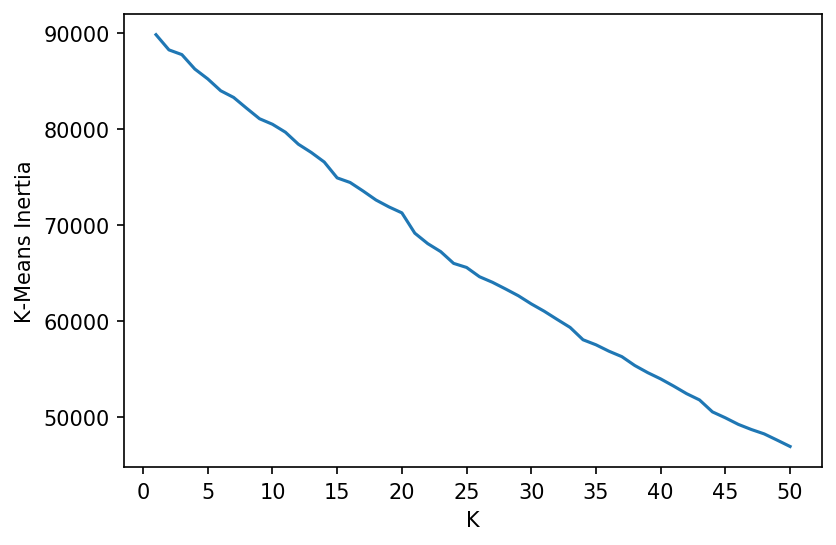

In [8]:
# plot k-means performance vs k

plt.rcParams['figure.dpi'] = 150
plt.plot([x[0] for x in results], [x[1] for x in results])
plt.xticks(np.arange(0,1+max(k_range),5))
#plt.tick_params(color='gray', labelcolor='gray')
plt.xlabel('K', color='black')
plt.ylabel('K-Means Inertia', color='black')
#plt.show()
plt.savefig('k-vs-inertia.png')

### 4.3 Collect the Cluster Labels for k=22
Create a neighborhood dataframe that now includes the cluster labels. 

In [13]:
from sklearn.cluster import KMeans

dfn = pd.read_pickle('./neighborhoods.gz')
dfp = pd.read_pickle('./planning_zones.gz')

k = 22
kmeans = KMeans(init='k-means++', n_clusters=k, random_state=0).fit(scaled_df)

dff = pd.read_pickle('./features.gz')
dff.insert(1, 'cluster_id', kmeans.labels_)

df = dfp.merge(dfn, on='zone_id', suffixes=('_zone', '_nbhood')).merge(dff, on='neighborhood_id', suffixes=('_nbhood', '_feature'))

df.to_pickle('./clustered_neighborhoods.gz')

f = open('test.csv', 'w')
print(','.join(df.columns), file=f)
for index,row in df.sort_values(by='cluster_id').iterrows():
    print('{}'.format(','.join(map(lambda q: str(q), row))), file=f)
f.close()

In [1]:
import matplotlib._color_data as mcd
import pandas as pd
import folium
import random
random.seed(435)

m = None

keys = [
    'red', 'red orange', 'orange', 'orange yellow', 'yellow', 'yellow green', 'green', 'green blue',
    'blue', 'indigo', 'blue violet', 'violet', 'pink', 'olive', 'maroon', 'peach',
    'mustard yellow', 'steel blue', 'neon pink', 'neon green', 'neon blue', 'black'
]

random.shuffle(keys)

colors = list(map(lambda q: mcd.XKCD_COLORS['xkcd:'+q], keys))

df = pd.read_pickle('./clustered_neighborhoods.gz')

for index,row in df.sort_values(by='cluster_id').iterrows():
    # plot directly
    m = folium.Map([39.966,-75.1586]) 
    for name, lat, lng, cluster in zip(df['neighborhood_name'], df['latitude_nbhood'], df['longitude_nbhood'], df['cluster_id']): 
        folium.CircleMarker((lat,lng), tooltip=name, color=colors[cluster], radius=10, fill=True, fill_opacity=0.7).add_to(m)       
m
m.save('nbhood_2')

In [2]:
import pandas as pd
import geocoder
import requests

def build_target_dataframe(targets):
    client_id = 'VUKHKNADL1KYMIMDT5L5LOWWUSSFZEJZZHGGD0Q1WUL3NZCP'
    client_secret = '1KRPTNYDVTS34LJ41IHKHJKOPVIW4FX501NLLH0NCYDXVAHA'
    radius = 1000
    limit = 100   

    base_url = url = 'https://api.foursquare.com/v2/venues/search?ll={},{}&intent=checkin&radius={}&client_id={}&client_secret={}&v={}&limit={}'
    target = []
    venue_id = []
    venue_name = []
    venue_cat = []
    idx = 1
    for name, coords in targets:
        lat = coords[0]
        lng = coords[1]
        url = base_url.format(lat, lng, radius, client_id, client_secret, 20191220, limit)
        response = requests.get(url)
        venues = response.json()['response']['venues']
        for v in venues:
            vname = v['name']
            distance = v['location']['distance']
            in_range = distance < radius
            if in_range:
                for c in v['categories']:
                    if not c['primary']:
                        continue
                    else:
                        target.append(name)
                        venue_id.append(idx)
                        venue_cat.append(c['name'])
                        venue_name.append(vname)
                        idx += 1
    target_df = pd.DataFrame({
        'venue_id': venue_id,
        'target_name': target,
        'venue_name': venue_name,
        'venue_cat': venue_cat
    })
    target_df.to_pickle('./targets.gz')


new_businesses = [
    {
        'name': 'Philippine BBQ',
        'address': '1700 Kirkwood Hwy, Wilmington, DE 19805'
    },
    {
        'name': 'De La Coeur',
        'address': '1836 Lovering Ave, Wilmington, DE 19806'
    },
    {
        'name': "Wang's Market",
        'address': '276 E Main St, Newark, DE, 19711'
    }
    
]

def get_coords(addr):
    g = geocoder.arcgis(addr)
    coords = g.geojson['features'][0]['geometry']['coordinates']
    return coords[1],coords[0]
    


targets = list(map(lambda e: (e['name'], get_coords(e['address'])), new_businesses))
for e in targets: 
    print(e)

#build_target_dataframe(targets)




('Philippine BBQ', (39.73832100000001, -75.606174))
('De La Coeur', (39.76116855688834, -75.56098948961686))
("Wang's Market", (39.68509499999999, -75.741687))


In [16]:
import pandas as pd

targets_df = pd.read_pickle('./targets.gz')

df_N = targets_df.groupby(['target_name'], as_index=False).count()
df_CN = targets_df.groupby(['target_name', 'venue_cat'], as_index=False).count()

venue_groups = []
stats = []
for tname, catname, count in zip(df_CN['target_name'], df_CN['venue_cat'], df_CN['venue_id']):
    total = df_N.loc[df_N['target_name'] == tname, 'venue_cat'].values[0]
    stats.append((tname, catname, count, total))
    
    # build a list of category group names, which we will summarize and add to stats later
    
    gg = group_map[catname] if catname in group_map else None
    if gg is not None:
        for g in gg:
            venue_groups.append((tname, g))

# build a temporary dataframe for the venue groups, quite similar to the venue dataframe

tmp_df = pd.DataFrame({
    'target_name': map(lambda q: q[0], venue_groups),
    'category_group': map(lambda q: q[1], venue_groups),
    'data': [0]*len(venue_groups)
})

# repeat the venue groupings with the group names, and add the remaining stats

df_N = tmp_df.groupby(['target_name'], as_index=False).count()
df_CN = tmp_df.groupby(['target_name', 'category_group'], as_index=False).count()
for nid, cg, num in zip(df_CN['target_name'], df_CN['category_group'], df_CN['data']):
    total = df_N.loc[df_N['target_name'] == nid, 'data'].values[0]
    stats.append((nid, cg, num, total))

# build and save a stats dataframe

stats_df = pd.DataFrame({
    'target_name': map(lambda t: t[0], stats),
    'category_group' : map(lambda t: t[1], stats),
    'count'          : map(lambda t: t[2], stats),
    'total'          : map(lambda t: t[3], stats),
})

stats_df.to_pickle('./target_raw_stats.gz')

In [7]:
import pandas as pd

stats_df = pd.read_pickle('./target_raw_stats.gz')

# process the stats into well formed rows with columns for all of the features

rows = {}
for nid,cname,num,tot in stats_df.sort_values(by=['target_name', 'category_group']).to_numpy():
    if nid not in rows:
        rows[nid] = [0]*len(feature_names)
    if cname in feature_map:
        idx = feature_map[cname]
        rows[nid][idx] = num/tot


# build and save the feature dataframe

feature_df = pd.DataFrame(list(map(lambda q: [q]+rows[q], rows.keys())), columns=['target_name'] + feature_names)
feature_df.to_pickle('./target_features.gz')
feature_df.head()

,target_name,Vegetarian / Vegan Restaurant,Arts & Crafts Store,American Restaurant,Gym,Hotel,Post Office,Building,Non-Profit,Coffee Shop,...,Auto,Retail,Beer/Wine/Liquor,Outdoors,Government Services,Beauty,ATM/Banks,Media Outlet,Residential,Commercial
0,De La Coeur,0,0,0.010753,0.010753,0,0,0.021505,0,0.000000,...,0.000000,0.224138,0.017241,0.017241,0.017241,0.034483,0.017241,0,0.034483,0.155172
1,Philippine BBQ,0,0,0.000000,0.000000,0,0,0.010989,0,0.021978,...,0.031250,0.234375,0.015625,0.015625,0.031250,0.046875,0.015625,0,0.031250,0.125000
2,Wang's Market,0,0,0.000000,0.000000,0,0,0.000000,0,0.000000,...,0.047619,0.285714,0.015873,0.031746,0.015873,0.015873,0.015873,0,0.015873,0.111111


In [19]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# prepare and scale the feature data

xfeatures_df = pd.read_pickle('./features.gz')
unscaled_df = xfeatures_df.drop(columns=['neighborhood_id'])
scaler = StandardScaler()
scaler.fit(unscaled_df)
scaled_df = scaler.transform(feature_df.drop(columns=['target_name']))
labels = kmeans.predict(scaled_df)
labels

array([ 7, 17,  6], dtype=int32)